Feature analysis
----------------

1. Feature space filtering based on logl thresholding to select only most significant features.
2. Visualise control and target cohorts by embedding in 3d space (pca) or 1d comparison by cosine similarity for each subject.
3. Assess effects of logl filtering on cluster separation. 

In [1]:
%autoreload 2 # development only: reload modified modules

In [2]:
import featurespace as fs # home grown logl and cooc processing

In [3]:
# master index of features for all samples can be created from samples:
# $ cut -f2 test-samples.tsv | sort | uniq > test-features.txt
feature_map = fs.make_featuremap(open('test-features.txt'))

In [4]:
ifm = {v:k for k, v in feature_map.items()} # inverse feature map

In [5]:
# compute co-occurrences of features per subject
# todo return features/per patient list for histogram analysis
C = fs.samples2cooc(feature_map, open('test-samples.tsv'))

[1:295][4:71][5:60][6:29][7:5][8:122][9:38][10:90][11:48][12:70][13:20][14:17][15:65][16:36][17:43][18:56][19:66][10:26][11:119][12:104][13:56][14:70][15:21][16:63][17:60][18:21][19:30][10:57][11:97][12:46][13:58][14:35][15:76][16:101][17:3][18:116][19:18][40:39][41:39][42:52][43:44][44:19][45:119][46:60][47:52][48:23][49:60][50:65][51:27][52:32][53:24][54:85][55:29][56:90][57:24][58:19][59:43][60:23][61:35][62:30][63:43][64:42][65:36][66:30][67:45][68:143][69:49][70:115][71:49][72:29][73:48][74:41][75:50][76:9][77:64][78:53][79:25][80:74][81:51][82:29][83:55][84:83][85:43][86:67][87:77][88:32][89:71][90:69][91:32][92:33][93:73][94:47][95:64][96:33][97:51][98:33][99:49][100:43][101:3][102:23][103:41][104:46][105:26][106:79][107:92][108:45][109:71][110:17][111:3][112:52][113:41][114:89][115:30][116:52][117:57][118:77][119:73][120:34][121:83][122:46][123:37][124:68][125:59][126:27][127:29][128:104][129:63][130:74][131:57][132:26][133:59][134:23][135:52][136:40][137:47][138:77][139:31][14

cooc: (3386, 3386)


In [6]:
# save to disk for later use
from scipy import io

In [7]:
io.mmwrite("test-cooc.mtx", C)

In [8]:
# compute log-likelihood matrix
L = fs.cooc2logl(C)

In [9]:
io.mmwrite("test-logl.mtx", L) # save as does not need recomputing

In [10]:
# pylab plotting 
%pylab inline
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


In [11]:
from scipy.sparse import find

In [12]:
# Find a threshold for most significant features by inspection

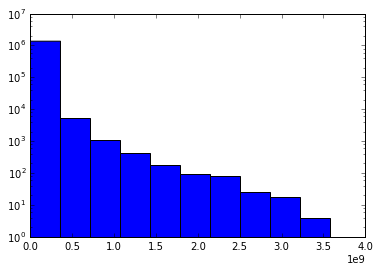

In [13]:
pl.hist(find(L)[2], log=True);

In [14]:
threshold = 2.5E9

In [21]:
ff = fs.filtered(C.tocsc(), L, 1.5E9) # N.B. this is a lazy generator

In [16]:
import pandas

In [22]:
# eyeball the most significant features 
pandas.DataFrame([(ll, int(oc), ifm[i], ifm[j]) for ll, oc, i, j in ff],
                 columns=('LogL','Occurs','A','B')).sort_values('LogL', ascending=False)

,LogL,Occurs,A,B
87,3.582075e+09,169,Disorder_of_skin_ANDOR_subcutaneous_tissue,Disorder_of_skin
85,3.582075e+09,169,Disorder_of_skin,Disorder_of_skin_ANDOR_subcutaneous_tissue
195,3.381736e+09,335,Patient_evaluation_and_management,Consultation
57,3.381736e+09,335,Consultation,Patient_evaluation_and_management
113,3.075962e+09,224,Fatigue,Asthenia
12,3.075962e+09,224,Asthenia,Fatigue
27,3.001070e+09,405,Carbohydrate_measurement,Glucose_measurement
119,3.001070e+09,405,Glucose_measurement,Carbohydrate_measurement
334,2.974840e+09,501,White_blood_cell_test,Haematology_test
125,2.974840e+09,501,Haematology_test,White_blood_cell_test


## Model Space
By selecting only those features that co-occur with LOGL greater than some threshold we can create vectors for each subject using only the most statistically significant features.
These may then be visualised (e.g. 3-D PCA projection or 1-D cosine) and clusters/classes observed. If there is clear discrimination then a classifier can be built and cross validated and ROC curves inspected to achive robusteness in the face of novel data.